In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from  sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Lojistik Regresyon

### Model Tahmin

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [12]:
loj_model=LogisticRegression(solver="liblinear").fit(X,y)

In [13]:
loj_model.intercept_

array([-5.88679617])

In [14]:
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

In [16]:
y_pred=loj_model.predict(X)

In [19]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [20]:
accuracy_score(y,y_pred)

0.7747395833333334

In [22]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [23]:
# Olasılık değerlerini görmek istersek:
loj_model.predict_proba(X)[0:10]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

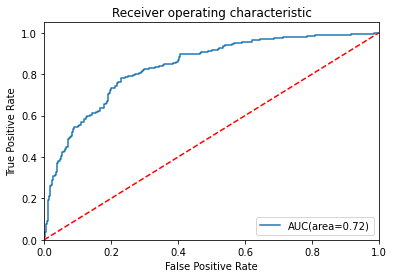

In [26]:
# Regresyon prob. MSE kullanmıştık Classification problemlerinde Roc eğrisi kullanacağız. 
# ROC eğrisi: AUC ne kadar genişse o kadar başarılı


logit_roc_auc=roc_auc_score(y,loj_model.predict(X))
fpr, tpr,thresholds=roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC(area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Loc_ROC')
plt.show()

####  AUC, “ROC Eğrisi altındaki alan” anlamına gelir. Bu alanın kapsamı AUC’dir. Kapsanan alan ne kadar büyükse, makine öğrenme modelleri o kadar iyi verilen sınıfları ayırt etmede daha iyidir.

### Model Tuning

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [31]:
loj_model=LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [32]:
y_pred=loj_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7662337662337663


In [36]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7704710144927536